<a href="https://colab.research.google.com/github/HagarElsherbiny/StockMarketPrediction/blob/main/Amazon.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
from google.colab import drive
drive.mount("/content/gdrive")

Mounted at /content/gdrive


In [2]:
import pandas as pd
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings("ignore")
Amazon = pd.read_csv('/content/gdrive/My Drive/AMZN.csv')


In [3]:
Amazon.head()

,Date,Open,High,Low,Close,Adj Close,Volume
0,2018-01-02,58.599998,59.500000,58.525501,59.450500,59.450500,53890000
1,2018-01-03,59.415001,60.274502,59.415001,60.209999,60.209999,62176000
2,2018-01-04,60.250000,60.793499,60.233002,60.479500,60.479500,60442000
3,2018-01-05,60.875500,61.457001,60.500000,61.457001,61.457001,70894000
4,2018-01-08,61.799999,62.653999,61.601501,62.343498,62.343498,85590000


In [4]:
Amazon.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1298 entries, 0 to 1297
Data columns (total 7 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   Date       1298 non-null   object 
 1   Open       1298 non-null   float64
 2   High       1298 non-null   float64
 3   Low        1298 non-null   float64
 4   Close      1298 non-null   float64
 5   Adj Close  1298 non-null   float64
 6   Volume     1298 non-null   int64  
dtypes: float64(5), int64(1), object(1)
memory usage: 71.1+ KB


In [5]:
length_data = len(Amazon)     # rows that data has
split_ratio = 0.8          # %80 train + %20 validation
length_train = round(length_data * split_ratio)  
length_validation = length_data - length_train
print("Data length :", length_data)
print("Train data length :", length_train)
print("Validation data lenth :", length_validation)

Data length : 1298
Train data length : 1038
Validation data lenth : 260


In [6]:
train_data = Amazon[:length_train].iloc[:,:2] 
train_data['Date'] = pd.to_datetime(train_data['Date'])  # converting to date time object
train_data

,Date,Open
0,2018-01-02,58.599998
1,2018-01-03,59.415001
2,2018-01-04,60.250000
3,2018-01-05,60.875500
4,2018-01-08,61.799999
...,...,...
1033,2022-02-08,156.750504
1034,2022-02-09,162.873505
1035,2022-02-10,158.350006
1036,2022-02-11,158.134506


In [7]:
validation_data = Amazon[length_train:].iloc[:,:2]
validation_data['Date'] = pd.to_datetime(validation_data['Date'])  # converting to date time object
validation_data

,Date,Open
1038,2022-02-15,157.605499
1039,2022-02-16,155.790497
1040,2022-02-17,158.145996
1041,2022-02-18,155.499496
1042,2022-02-22,150.478500
...,...,...
1293,2023-02-22,95.099998
1294,2023-02-23,96.120003
1295,2023-02-24,93.529999
1296,2023-02-27,94.279999


In [8]:
#Creating Train Dataset from Train split

dataset_train = train_data.Open.values
dataset_train.shape


(1038,)

In [9]:
# Change 1d array to 2d array
# Changing shape from (1692,) to (1692,1)
dataset_train = np.reshape(dataset_train, (-1,1))
dataset_train.shape

(1038, 1)

In [10]:
#Normalization / Feature Scaling

from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler(feature_range = (0,1))


# scaling dataset
dataset_train_scaled = scaler.fit_transform(dataset_train)

dataset_train_scaled.shape

(1038, 1)

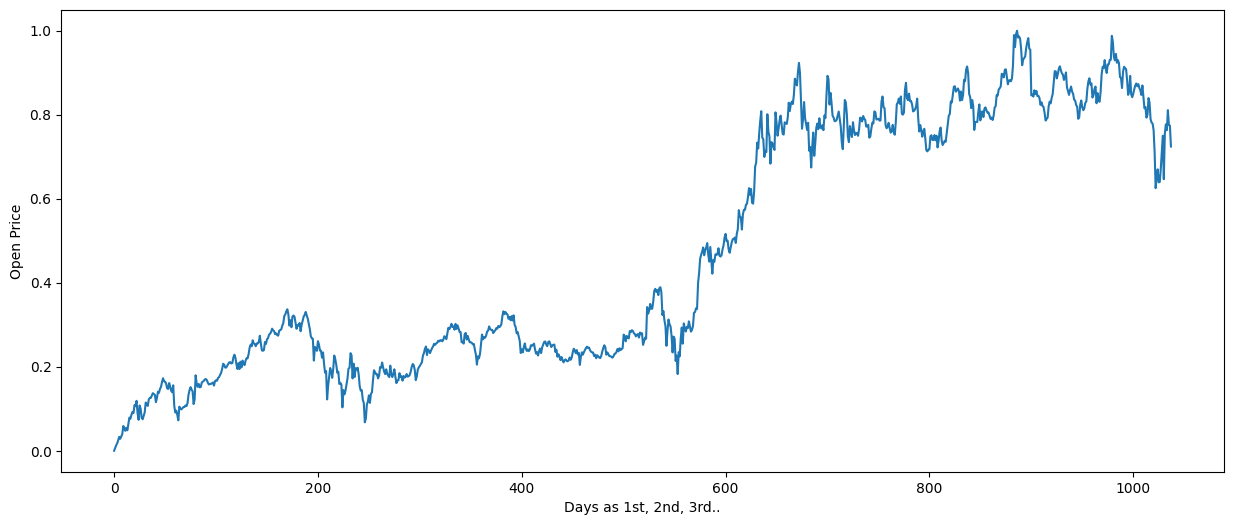

In [11]:
plt.subplots(figsize = (15,6))
plt.plot(dataset_train_scaled)
plt.xlabel("Days as 1st, 2nd, 3rd..")
plt.ylabel("Open Price")
plt.show()

In [12]:
#Creating X_train and y_train from Training data

X_train = []
y_train = []

time_step = 50

for i in range(time_step, length_train):
    X_train.append(dataset_train_scaled[i-time_step:i,0])
    y_train.append(dataset_train_scaled[i,0])

        
# convert list to array
X_train, y_train = np.array(X_train), np.array(y_train)

In [13]:
print("Shape of X_train before reshape :",X_train.shape)
print("Shape of y_train before reshape :",y_train.shape)

Shape of X_train before reshape : (988, 50)
Shape of y_train before reshape : (988,)


In [14]:
#Reshape

X_train = np.reshape(X_train, (X_train.shape[0], X_train.shape[1],1))
y_train = np.reshape(y_train, (y_train.shape[0],1))

print("Shape of X_train after reshape :",X_train.shape)
print("Shape of y_train after reshape :",y_train.shape)

Shape of X_train after reshape : (988, 50, 1)
Shape of y_train after reshape : (988, 1)


In [15]:
X_train[0]

array([[0.        ],
       [0.0063375 ],
       [0.0128305 ],
       [0.01769442],
       [0.02488337],
       [0.03300935],
       [0.02844092],
       [0.03411355],
       [0.03942068],
       [0.05870921],
       [0.05452568],
       [0.04741449],
       [0.05443235],
       [0.04866641],
       [0.06457624],
       [0.07885691],
       [0.07620532],
       [0.08554047],
       [0.09221619],
       [0.0898795 ],
       [0.10859257],
       [0.1061431 ],
       [0.1187364 ],
       [0.08966562],
       [0.07366252],
       [0.10769828],
       [0.10018665],
       [0.07833983],
       [0.07491058],
       [0.08317654],
       [0.091077  ],
       [0.11465397],
       [0.11095258],
       [0.10672242],
       [0.1216952 ],
       [0.12572317],
       [0.1257154 ],
       [0.13110421],
       [0.13705288],
       [0.13511278],
       [0.13281495],
       [0.11551325],
       [0.12528771],
       [0.14043551],
       [0.13783824],
       [0.14696736],
       [0.15221621],
       [0.163

In [16]:
y_train[0]

array([0.16446347])

In [17]:
#Creating RNN model

# importing libraries
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import SimpleRNN
from keras.layers import Dropout

# initializing the RNN
regressor = Sequential()

# adding first RNN layer and dropout regulatization
regressor.add(
    SimpleRNN(units = 50, 
              activation = "tanh", 
              return_sequences = True, 
              input_shape = (X_train.shape[1],1))
             )


regressor.add(
    Dropout(0.2)
             )


# adding second RNN layer and dropout regulatization

regressor.add(
    SimpleRNN(units = 50, 
              activation = "tanh", 
              return_sequences = True)
             )

regressor.add(
    Dropout(0.2)
             )

# adding third RNN layer and dropout regulatization

regressor.add(
    SimpleRNN(units = 50, 
              activation = "tanh", 
              return_sequences = True)
             )

regressor.add(
    Dropout(0.2)
             )

# adding fourth RNN layer and dropout regulatization

regressor.add(
    SimpleRNN(units = 50)
             )

regressor.add(
    Dropout(0.2)
             )

# adding the output layer
regressor.add(Dense(units = 1))

# compiling RNN
regressor.compile(
    optimizer = "adam", 
    loss = "mean_squared_error",
    metrics = ["accuracy"])

# fitting the RNN
history = regressor.fit(X_train, y_train, epochs = 75, batch_size = 32)

Epoch 1/75
31/31 [==============================] - 7s 65ms/step - loss: 0.3687 - accuracy: 0.0000e+00
Epoch 2/75
31/31 [==============================] - 2s 54ms/step - loss: 0.2481 - accuracy: 0.0000e+00
Epoch 3/75
31/31 [==============================] - 2s 53ms/step - loss: 0.1862 - accuracy: 0.0000e+00
Epoch 4/75
31/31 [==============================] - 2s 53ms/step - loss: 0.1601 - accuracy: 0.0010
Epoch 5/75
31/31 [==============================] - 2s 54ms/step - loss: 0.1304 - accuracy: 0.0010
Epoch 6/75
31/31 [==============================] - 2s 54ms/step - loss: 0.1187 - accuracy: 0.0000e+00
Epoch 7/75
31/31 [==============================] - 2s 79ms/step - loss: 0.0941 - accuracy: 0.0010
Epoch 8/75
31/31 [==============================] - 3s 95ms/step - loss: 0.0785 - accuracy: 0.0010
Epoch 9/75
31/31 [==============================] - 2s 54ms/step - loss: 0.0681 - accuracy: 0.0010
Epoch 10/75
31/31 [==============================] - 2s 54ms/step - loss: 0.0626 - accuracy: 

In [18]:
#Evaluating Model


# Losses
history.history["loss"]

[0.3687411844730377,
 0.24812021851539612,
 0.18619872629642487,
 0.1601235419511795,
 0.13044306635856628,
 0.11866331845521927,
 0.09412413090467453,
 0.07851313054561615,
 0.06807436794042587,
 0.0626164898276329,
 0.049681685864925385,
 0.048370037227869034,
 0.03952556848526001,
 0.0374164953827858,
 0.03442914038896561,
 0.03187531977891922,
 0.02837345190346241,
 0.027850374579429626,
 0.022877413779497147,
 0.023199863731861115,
 0.021272966638207436,
 0.019738685339689255,
 0.017161551862955093,
 0.01849164254963398,
 0.01673687994480133,
 0.015077096410095692,
 0.013375547714531422,
 0.013341293670237064,
 0.012511447072029114,
 0.011928049847483635,
 0.0123147526755929,
 0.01121990941464901,
 0.01117075514048338,
 0.010446309112012386,
 0.00975420419126749,
 0.00964487437158823,
 0.009170318022370338,
 0.00933909323066473,
 0.008335388265550137,
 0.008354340679943562,
 0.008168860338628292,
 0.007612091954797506,
 0.006583969574421644,
 0.006928310263901949,
 0.0063998610712

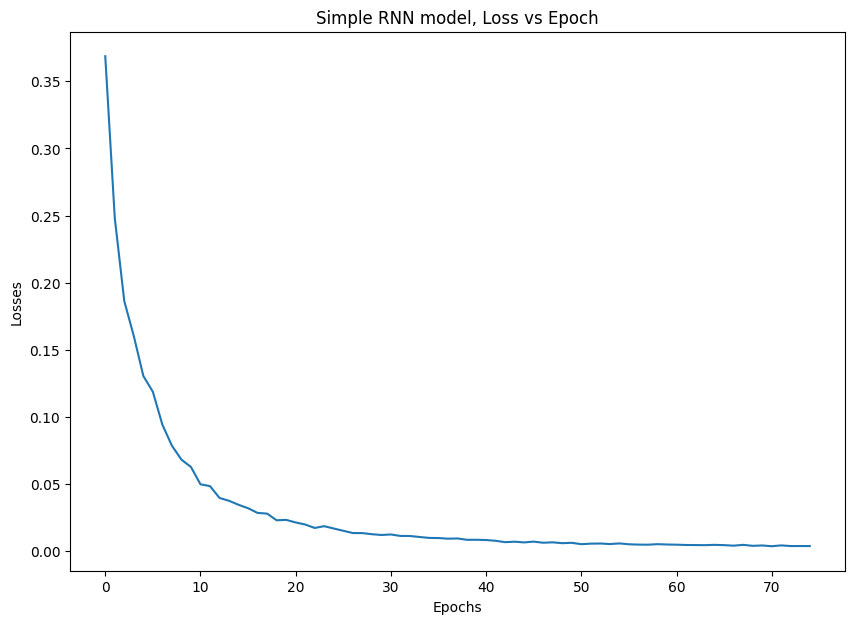

In [19]:
# Plotting Loss vs Epochs
plt.figure(figsize =(10,7))
plt.plot(history.history["loss"])
plt.xlabel("Epochs")
plt.ylabel("Losses")
plt.title("Simple RNN model, Loss vs Epoch")
plt.show()

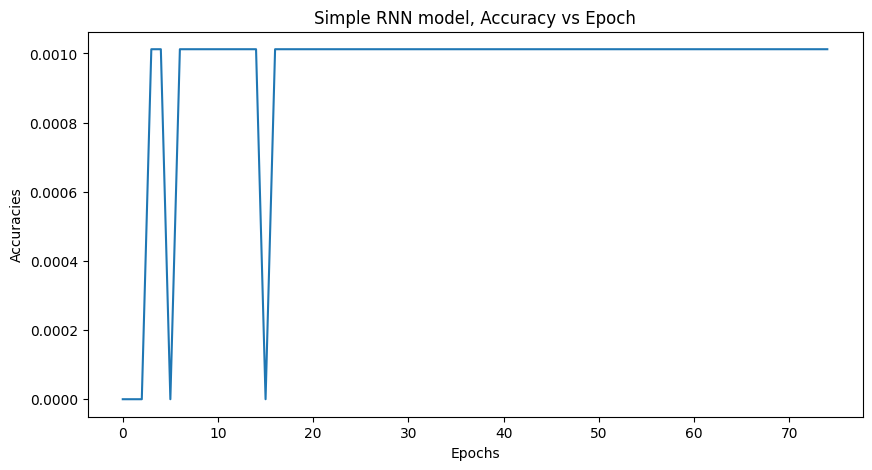

In [20]:
# Plotting Accuracy vs Epochs
plt.figure(figsize =(10,5))
plt.plot(history.history["accuracy"])
plt.xlabel("Epochs")
plt.ylabel("Accuracies")
plt.title("Simple RNN model, Accuracy vs Epoch")
plt.show()

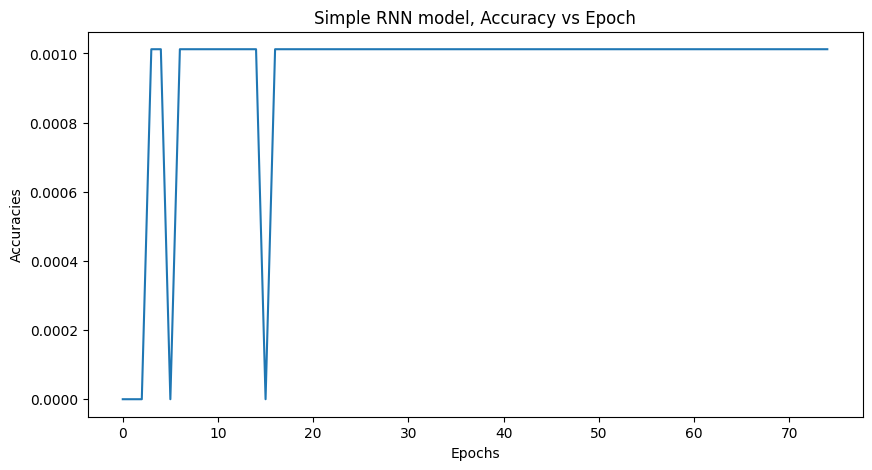

In [21]:
# Plotting Accuracy vs Epochs
plt.figure(figsize =(10,5))
plt.plot(history.history["accuracy"])
plt.xlabel("Epochs")
plt.ylabel("Accuracies")
plt.title("Simple RNN model, Accuracy vs Epoch")
plt.show()

In [22]:

#Model predictions for train data

y_pred = regressor.predict(X_train)  # predictions
y_pred = scaler.inverse_transform(y_pred) # scaling back from 0-1 to original
y_pred.shape

31/31 [==============================] - 2s 26ms/step


(988, 1)

In [23]:
y_train = scaler.inverse_transform(y_train) # scaling back from 0-1 to original
y_train.shape

(988, 1)

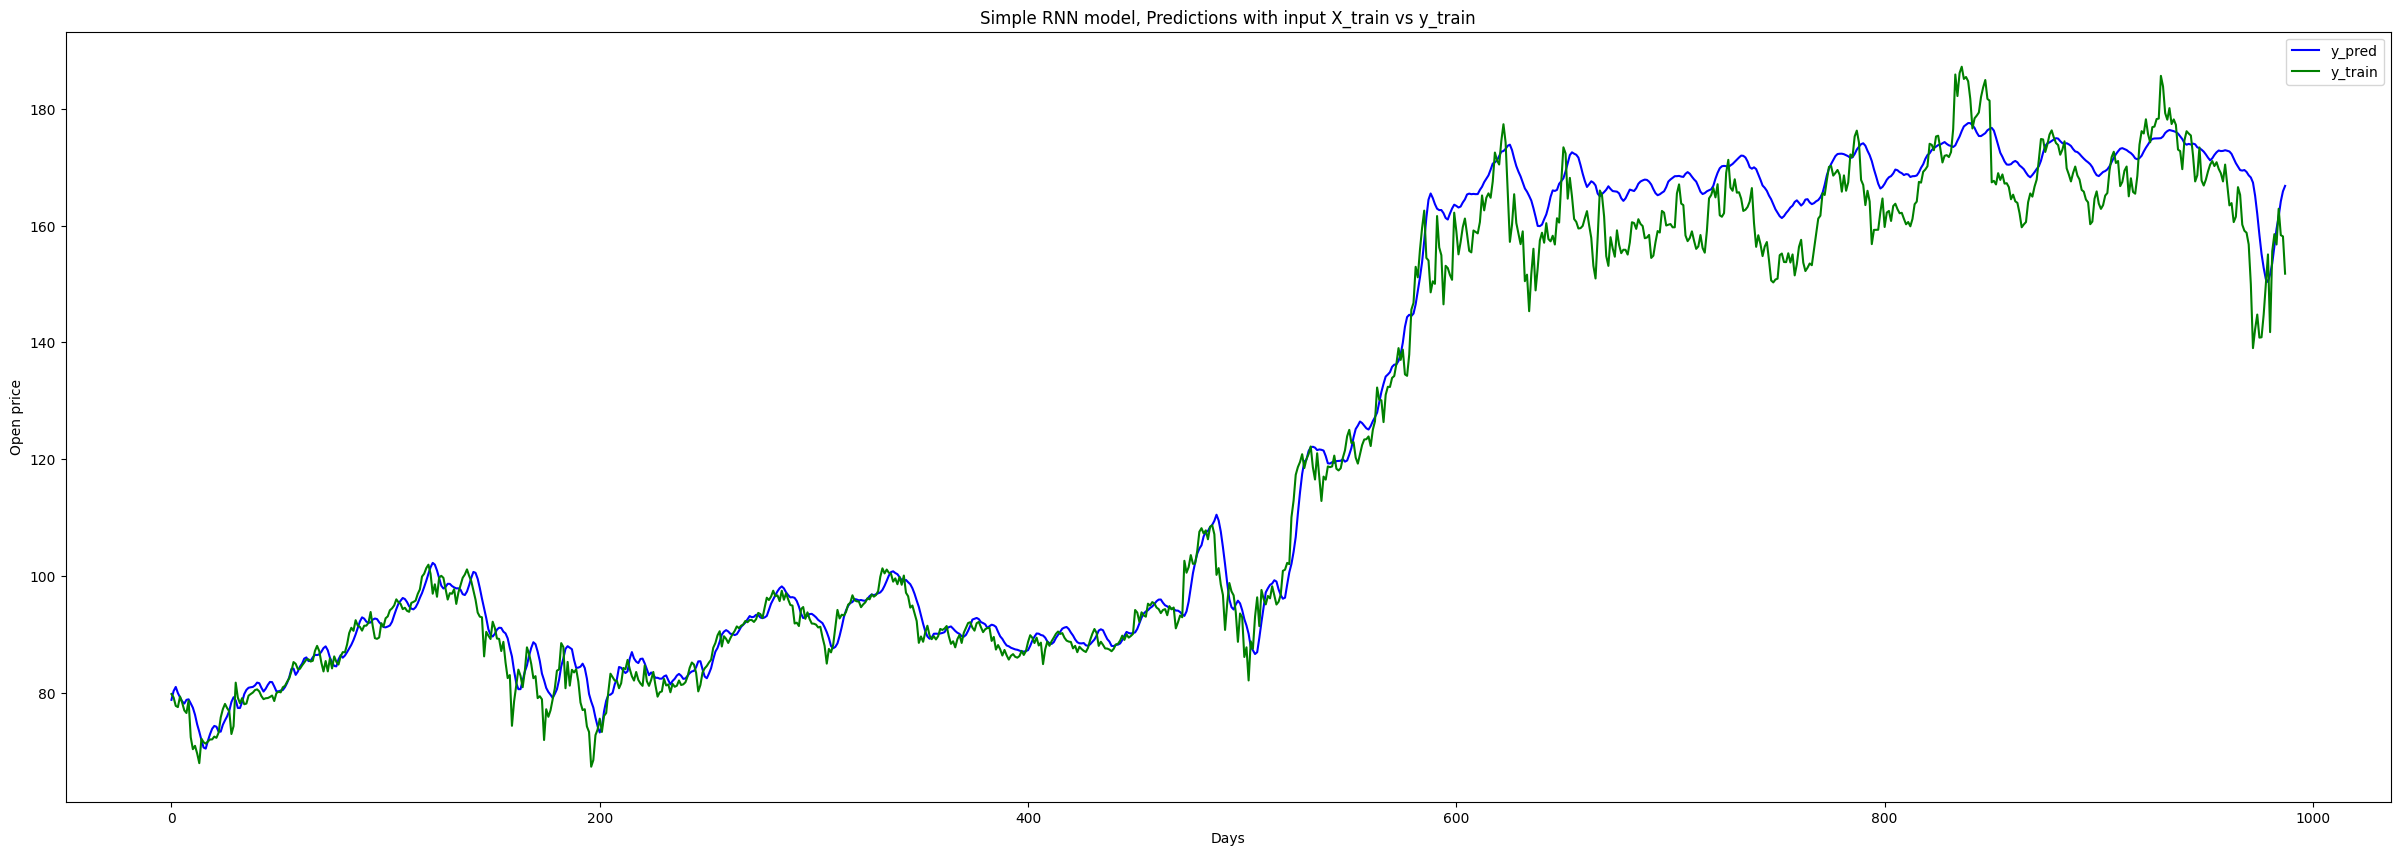

In [24]:
# visualisation
plt.figure(figsize = (30,10))
plt.plot(y_pred, color = "b", label = "y_pred" )
plt.plot(y_train, color = "g", label = "y_train")
plt.xlabel("Days")
plt.ylabel("Open price")
plt.title("Simple RNN model, Predictions with input X_train vs y_train")
plt.legend()
plt.show()

In [25]:
#Creating Test Dataset from Validation Data

#Converting array and scaling

dataset_validation = validation_data.Open.values  # getting "open" column and converting to array
dataset_validation = np.reshape(dataset_validation, (-1,1))  # converting 1D to 2D array
scaled_dataset_validation =  scaler.fit_transform(dataset_validation)  # scaling open values to between 0 and 1
print("Shape of scaled validation dataset :",scaled_dataset_validation.shape)

Shape of scaled validation dataset : (260, 1)


In [26]:
#Creating X_test and y_test

X_test = []
y_test = []

for i in range(time_step, length_validation):
    X_test.append(scaled_dataset_validation[i-time_step:i,0])
    y_test.append(scaled_dataset_validation[i,0])

In [27]:
# Converting to array
X_test, y_test = np.array(X_test), np.array(y_test)

In [28]:
print("Shape of X_test before reshape :",X_test.shape)
print("Shape of y_test before reshape :",y_test.shape)

Shape of X_test before reshape : (210, 50)
Shape of y_test before reshape : (210,)


In [29]:
#Reshape

X_test = np.reshape(X_test, (X_test.shape[0],X_test.shape[1],1))  # reshape to 3D array
y_test = np.reshape(y_test, (-1,1))  # reshape to 2D array

In [30]:
print("Shape of X_test after reshape :",X_test.shape)
print("Shape of y_test after reshape :",y_test.shape)

Shape of X_test after reshape : (210, 50, 1)
Shape of y_test after reshape : (210, 1)


In [31]:
#Evaluating with Validation Data

# predictions with X_test data
y_pred_of_test = regressor.predict(X_test)
# scaling back from 0-1 to original
y_pred_of_test = scaler.inverse_transform(y_pred_of_test) 
print("Shape of y_pred_of_test :",y_pred_of_test.shape)

7/7 [==============================] - 0s 15ms/step
Shape of y_pred_of_test : (210, 1)


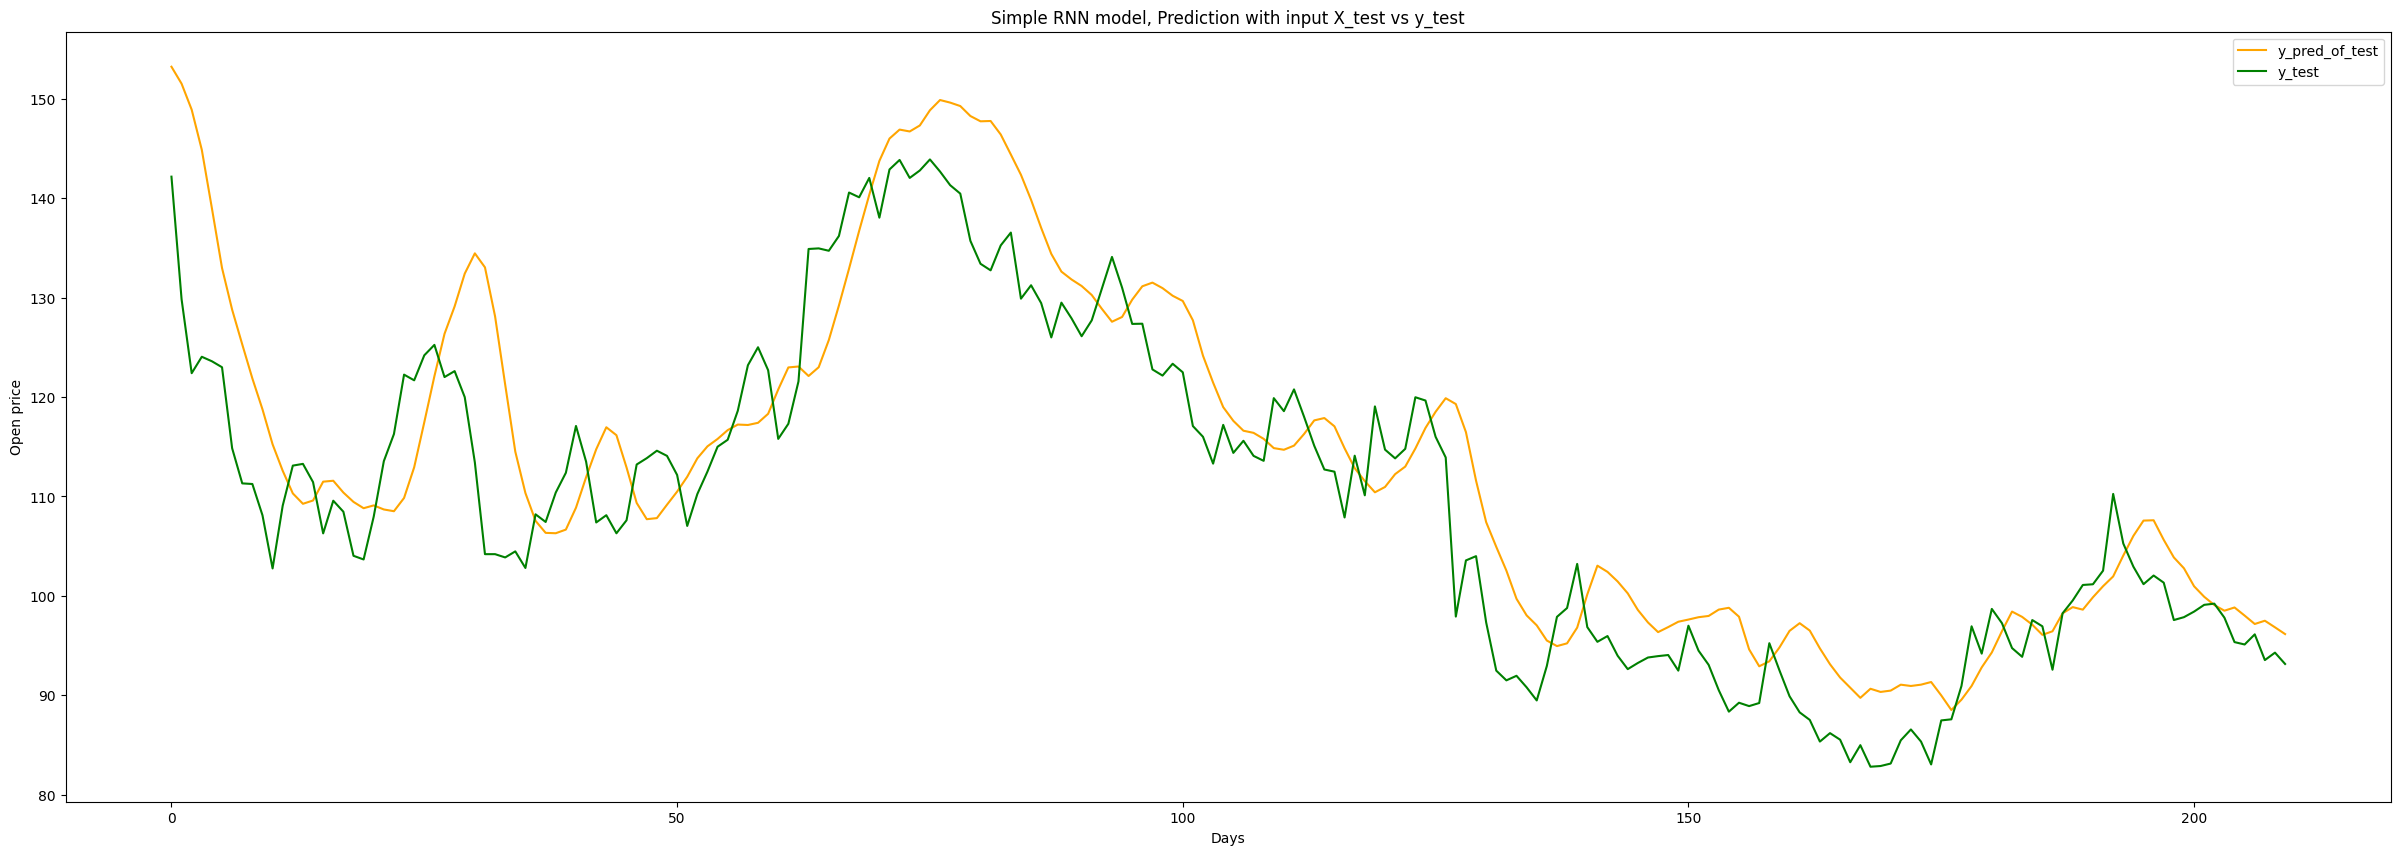

In [32]:
# visualisation
plt.figure(figsize = (30,10))
plt.plot(y_pred_of_test, label = "y_pred_of_test", c = "orange")
plt.plot(scaler.inverse_transform(y_test), label = "y_test", c = "g")
plt.xlabel("Days")
plt.ylabel("Open price")
plt.title("Simple RNN model, Prediction with input X_test vs y_test")
plt.legend()
plt.show()

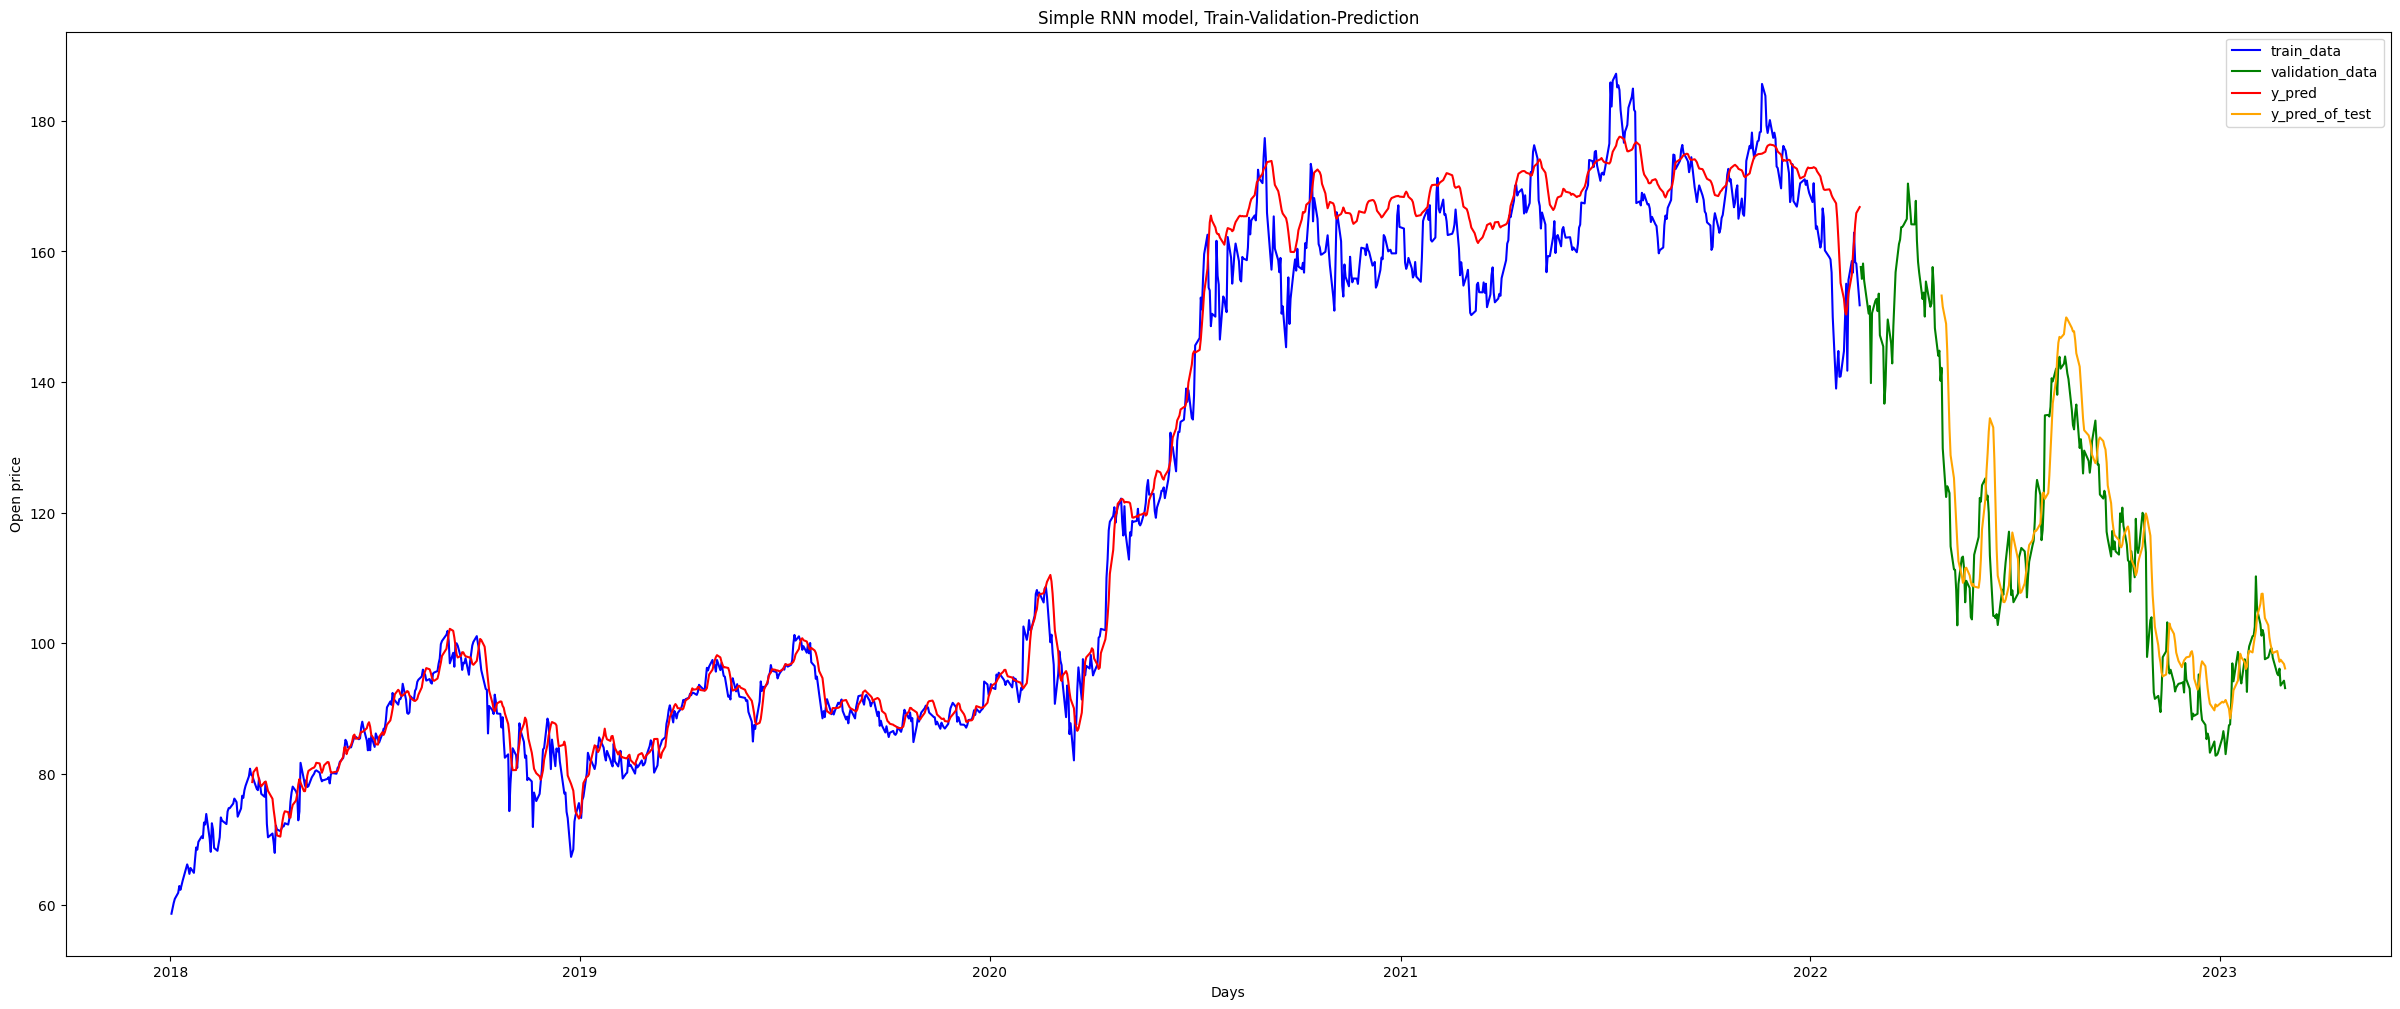

In [33]:
# Visualisation
plt.subplots(figsize =(30,12))
plt.plot(train_data.Date, train_data.Open, label = "train_data", color = "b")
plt.plot(validation_data.Date, validation_data.Open, label = "validation_data", color = "g")
plt.plot(train_data.Date.iloc[time_step:], y_pred, label = "y_pred", color = "r")
plt.plot(validation_data.Date.iloc[time_step:], y_pred_of_test, label = "y_pred_of_test", color = "orange")
plt.xlabel("Days")
plt.ylabel("Open price")
plt.title("Simple RNN model, Train-Validation-Prediction")
plt.legend()
plt.show()


In [34]:
#Creating LSTM Model

y_train = scaler.fit_transform(y_train)


In [35]:
#Creating LSTM Model

from keras.layers import LSTM

model_lstm = Sequential()
model_lstm.add(
    LSTM(64,return_sequences=True,input_shape = (X_train.shape[1],1))) #64 lstm neuron block
model_lstm.add(
    LSTM(64, return_sequences= False))
model_lstm.add(Dense(32))
model_lstm.add(Dense(1))
model_lstm.compile(loss = "mean_squared_error", optimizer = "adam", metrics = ["accuracy"])
history2 = model_lstm.fit(X_train, y_train, epochs = 75, batch_size = 10)

Epoch 1/75
99/99 [==============================] - 11s 64ms/step - loss: 0.0109 - accuracy: 0.0020
Epoch 2/75
99/99 [==============================] - 5s 50ms/step - loss: 0.0021 - accuracy: 0.0020
Epoch 3/75
99/99 [==============================] - 7s 67ms/step - loss: 0.0020 - accuracy: 0.0020
Epoch 4/75
99/99 [==============================] - 6s 57ms/step - loss: 0.0018 - accuracy: 0.0020
Epoch 5/75
99/99 [==============================] - 6s 64ms/step - loss: 0.0015 - accuracy: 0.0020
Epoch 6/75
99/99 [==============================] - 8s 78ms/step - loss: 0.0017 - accuracy: 0.0020
Epoch 7/75
99/99 [==============================] - 5s 51ms/step - loss: 0.0015 - accuracy: 0.0020
Epoch 8/75
99/99 [==============================] - 6s 60ms/step - loss: 0.0012 - accuracy: 0.0020
Epoch 9/75
99/99 [==============================] - 6s 59ms/step - loss: 0.0012 - accuracy: 0.0020
Epoch 10/75
99/99 [==============================] - 5s 51ms/step - loss: 0.0012 - accuracy: 0.0020
Epoch 11

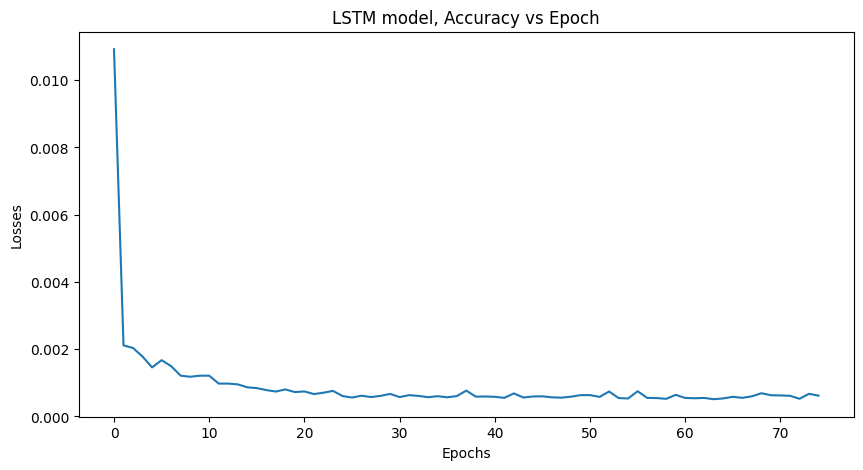

In [36]:
#Evaluating LSTM Model

plt.figure(figsize =(10,5))
plt.plot(history2.history["loss"])
plt.xlabel("Epochs")
plt.ylabel("Losses")
plt.title("LSTM model, Accuracy vs Epoch")
plt.show()

7/7 [==============================] - 2s 27ms/step


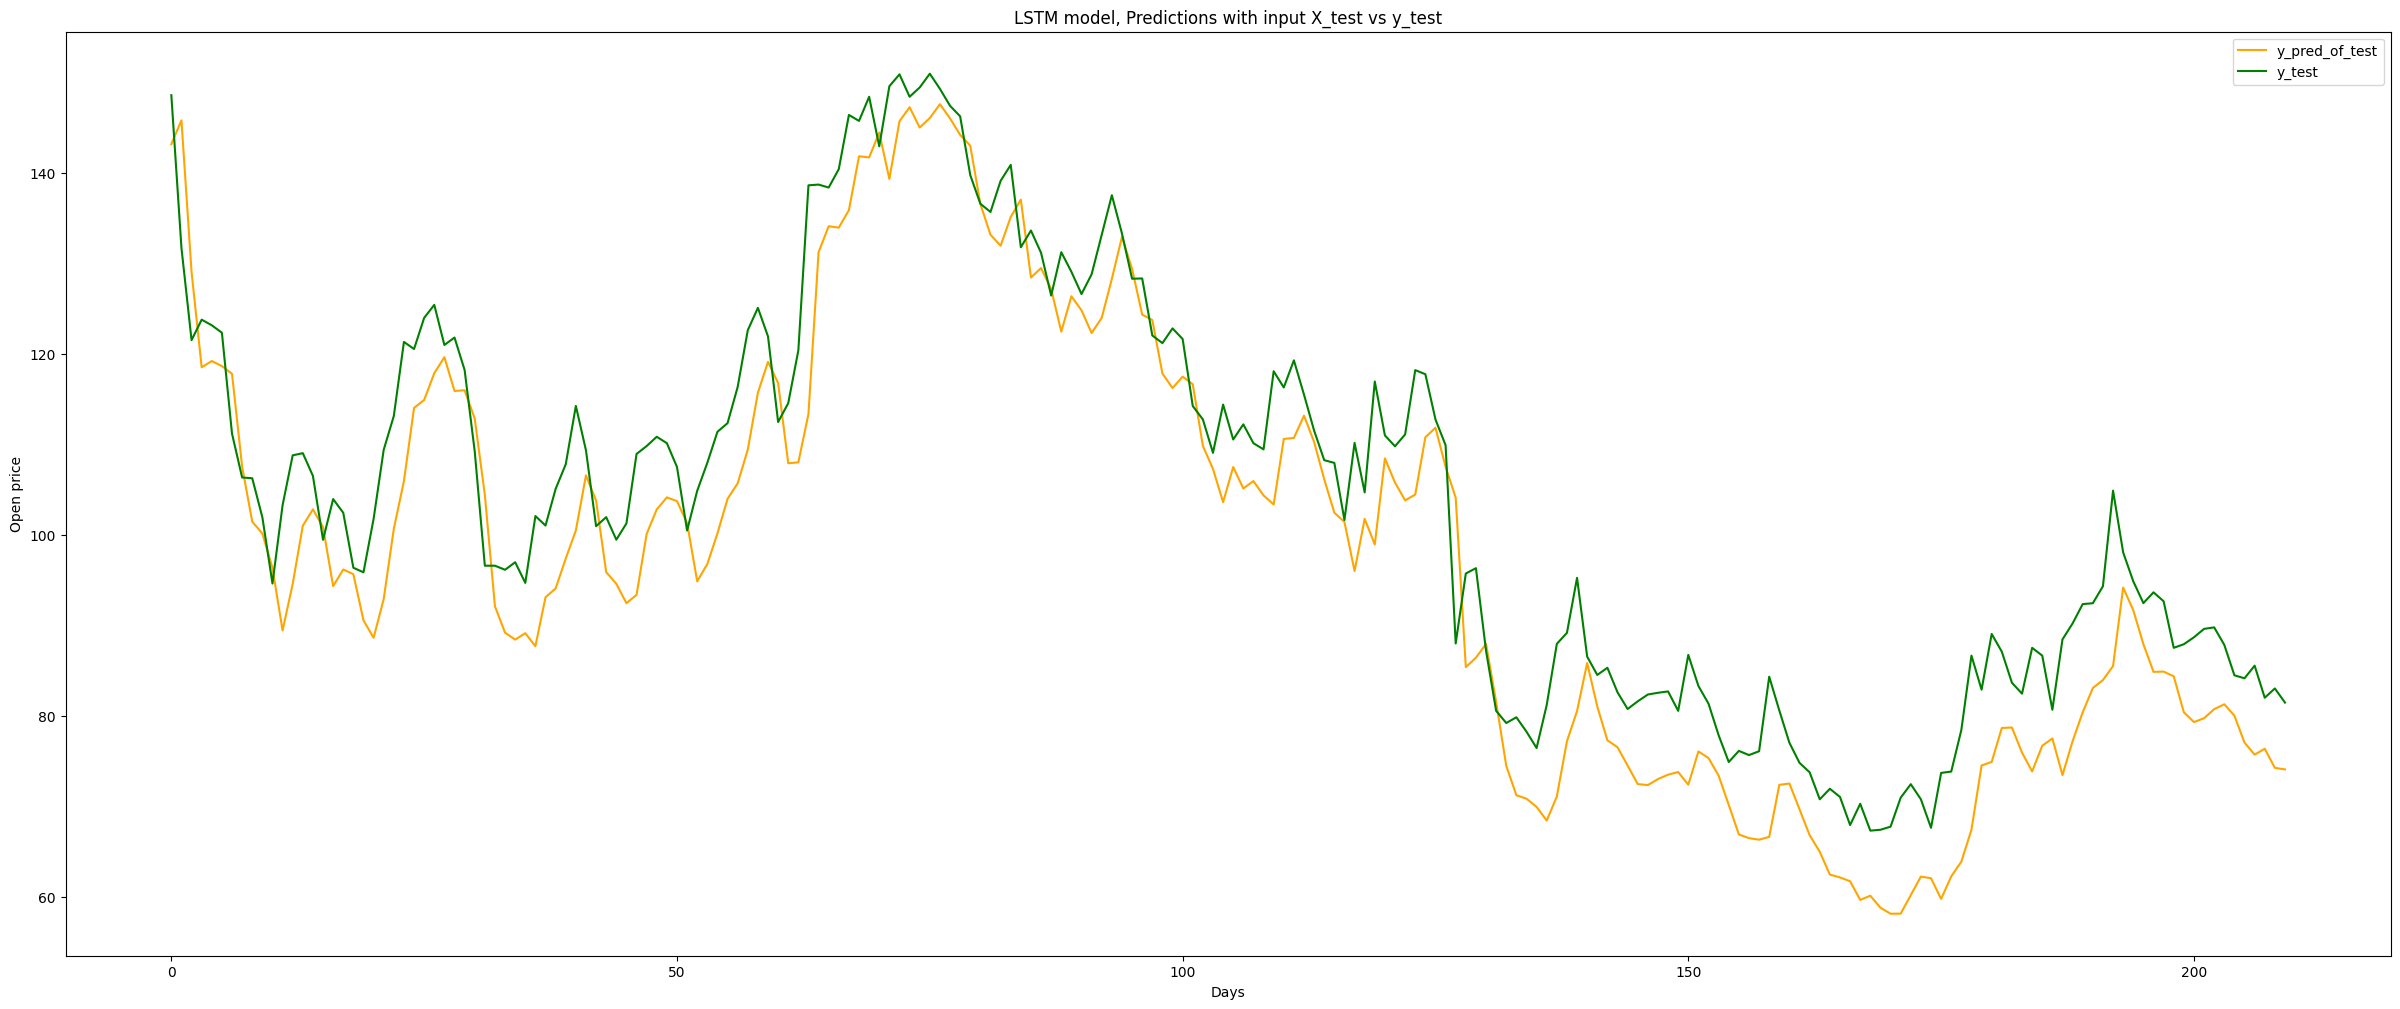

In [37]:
plt.subplots(figsize =(30,12))
plt.plot(scaler.inverse_transform(model_lstm.predict(X_test)), label = "y_pred_of_test", c = "orange" )
plt.plot(scaler.inverse_transform(y_test), label = "y_test", color = "g")
plt.xlabel("Days")
plt.ylabel("Open price")
plt.title("LSTM model, Predictions with input X_test vs y_test")
plt.legend()
plt.show()

In [38]:
#Future price prediction

Amazon.iloc[-1]

Date         2023-02-28
Open          93.139999
High          94.690002
Low           92.919998
Close         94.230003
Adj Close     94.230003
Volume         43959300
Name: 1297, dtype: object

In [39]:
X_input = Amazon.iloc[-time_step:].Open.values               # getting last 50 rows and converting to array
X_input = scaler.fit_transform(X_input.reshape(-1,1))      # converting to 2D array and scaling
X_input = np.reshape(X_input, (1,50,1))                    # reshaping : converting to 3D array
print("Shape of X_input :", X_input.shape)
X_input

Shape of X_input : (1, 50, 1)


array([[[0.25828768],
        [0.19927121],
        [0.17158468],
        [0.09216755],
        [0.12313287],
        [0.09908905],
        [0.01639334],
        [0.07905276],
        [0.        ],
        [0.00255009],
        [0.01165756],
        [0.09690333],
        [0.13661204],
        [0.09216755],
        [0.00837873],
        [0.16976308],
        [0.1737704 ],
        [0.29617479],
        [0.51475405],
        [0.41457189],
        [0.57850633],
        [0.52641161],
        [0.43497254],
        [0.40291436],
        [0.53770479],
        [0.51475405],
        [0.35555541],
        [0.56247711],
        [0.60947169],
        [0.66630219],
        [0.66885257],
        [0.71876132],
        [1.        ],
        [0.81821499],
        [0.7333333 ],
        [0.66921665],
        [0.70091075],
        [0.6746812 ],
        [0.53770479],
        [0.54826946],
        [0.56867041],
        [0.59344243],
        [0.59781413],
        [0.54644815],
        [0.4568304 ],
        [0

In [40]:
simple_RNN_prediction = scaler.inverse_transform(regressor.predict(X_input))
LSTM_prediction = scaler.inverse_transform(model_lstm.predict(X_input))
print("Simple RNN, Open price prediction for 4/8/2020     :", simple_RNN_prediction[0,0])
print("LSTM prediction, Open price prediction for 4/8/2022 :", LSTM_prediction[0,0])

1/1 [==============================] - 0s 114ms/step
Simple RNN, Open price prediction for 4/8/2020     : 96.31358
LSTM prediction, Open price prediction for 4/8/2022 : 92.014496
